# **MIE1624 Assignment 2**

## **Import Libraries**

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download("stopwords")
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **1. Data Cleaning**

In this part, we are going to clean both the Generic_tweets.txt and the Canadian_elections_2019.csv because these 2 datasets were collected directly from the web, thus they contain a lot of useless information, such as html tags and attributes, html character codes, URLs, and so on. By removing these irrelevant information, we ontain a more unadulterated dataset, which is useful for the subsequent analysis.

### **1.1. Generic Tweets Cleaning**

We use the open and read function here to read the txt file into a list.

In [195]:
f_Generic = open('generic_tweets.txt','r').read()
f_Generic[0:2000]

'"class","id","date","query","user","text"\n"0","1467810369","Mon Apr 06 22:19:45 PDT 2009","NO_QUERY","_TheSpecialOne_","@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D"\n"0","1467810672","Mon Apr 06 22:19:49 PDT 2009","NO_QUERY","scotthamilton","is upset that he can\'t update his Facebook by texting it... and might cry as a result  School today also. Blah!"\n"0","1467810917","Mon Apr 06 22:19:53 PDT 2009","NO_QUERY","mattycus","@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds"\n"0","1467811184","Mon Apr 06 22:19:57 PDT 2009","NO_QUERY","ElleCTF","my whole body feels itchy and like its on fire "\n"0","1467811193","Mon Apr 06 22:19:57 PDT 2009","NO_QUERY","Karoli","@nationwideclass no, it\'s not behaving at all. i\'m mad. why am i here? because I can\'t see you all over there. "\n"0","1467811372","Mon Apr 06 22:20:00 PDT 2009","NO_QUERY","joy_wolf","@Kwesidei not the whole crew

We split the text into different lines, by puting the argument "\n". Then we see that the text is organized by lines. Each line has different fields of the data: class, id, date, query, user, text. As shown below, the first line contains the headings and the last line is empty. We remove these two lines by using "del".

In [196]:
TweetsList_G = f_Generic.split('\n')
TweetsList_G[0:5]

['"class","id","date","query","user","text"',
 '"0","1467810369","Mon Apr 06 22:19:45 PDT 2009","NO_QUERY","_TheSpecialOne_","@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D"',
 '"0","1467810672","Mon Apr 06 22:19:49 PDT 2009","NO_QUERY","scotthamilton","is upset that he can\'t update his Facebook by texting it... and might cry as a result  School today also. Blah!"',
 '"0","1467810917","Mon Apr 06 22:19:53 PDT 2009","NO_QUERY","mattycus","@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds"',
 '"0","1467811184","Mon Apr 06 22:19:57 PDT 2009","NO_QUERY","ElleCTF","my whole body feels itchy and like its on fire "']

In [197]:
TweetsList_G[-4:]

['"4","1693956099","Mon May 04 00:27:14 PDT 2009","NO_QUERY","elysion32","Okie doke!! Time for me to escape for the North while Massa\'s back is turned. Be on when I get home folks "',
 '"4","1693956134","Mon May 04 00:27:14 PDT 2009","NO_QUERY","fancyjessy","finished the lessons, hooray! "',
 '"4","1693956160","Mon May 04 00:27:14 PDT 2009","NO_QUERY","noraezan","Some ppl are just fucking KP0. Cb ! Stop asking me laa.. I love my boyfriend and thats it. "',
 '']

In [0]:
del TweetsList_G[0]
del TweetsList_G[-1]

In [199]:
TweetsList_G[-4:]

['"4","1693956096","Mon May 04 00:27:14 PDT 2009","NO_QUERY","softthistle","@altitis and to you! "',
 '"4","1693956099","Mon May 04 00:27:14 PDT 2009","NO_QUERY","elysion32","Okie doke!! Time for me to escape for the North while Massa\'s back is turned. Be on when I get home folks "',
 '"4","1693956134","Mon May 04 00:27:14 PDT 2009","NO_QUERY","fancyjessy","finished the lessons, hooray! "',
 '"4","1693956160","Mon May 04 00:27:14 PDT 2009","NO_QUERY","noraezan","Some ppl are just fucking KP0. Cb ! Stop asking me laa.. I love my boyfriend and thats it. "']

After we removed the first and last lines, we get the data for all the tweets. Each line is a single tweet. Since we are interested in the tweets text, which is the element after "user", we locate it using the following code. Then we also remove the extra quotation mark to make the text more tidy.

In [200]:
 TweetsList_G[5].split(',',5)[5]

'"@Kwesidei not the whole crew "'

In [201]:
TweetsList_G[5].split(',',5)[5].strip('"')

'@Kwesidei not the whole crew '

Apply the above cleaning procedure to all the tweets in the generic_tweets file. We are only interested in the tweets text and the sentiment. Therefore, we extract these two elements and create a dataframe which is shown as below.

In [0]:
Tweets_G = [tw.split(',',5)[5].strip('"') for tw in TweetsList_G]
Sentiments_G = [float(tw.split(',')[0].strip('"')) for tw in TweetsList_G]

In [203]:
print(len(Tweets_G),len(Sentiments_G))

200000 200000


In [204]:
df_Generic = pd.DataFrame ({'tweets': Tweets_G,'sentiment':Sentiments_G})
df_Generic.head()

,tweets,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0.0
1,is upset that he can't update his Facebook by ...,0.0
2,@Kenichan I dived many times for the ball. Man...,0.0
3,my whole body feels itchy and like its on fire,0.0
4,"@nationwideclass no, it's not behaving at all....",0.0


As mentioned above, the file contains lots of irrelevant infomation. Firstly, we find all the HTML codes in the text by using the following codes.

In [0]:
df_Generic_HtmlCode = df_Generic[df_Generic['tweets'].str.contains('&[a-z]{2,4};')]

In [0]:
HtmlCode_list = []
for tweet in df_Generic_HtmlCode['tweets']:
  HtmlCode_list.append(re.findall('&[a-z]{2,4};', tweet))

We can find the following 4 types of HTML codes that are included in the text. There are also some HEX codes in the text, such as xfb\\x03\\x7f. We will also remove these HEX codes using the Text_cleaner defined below.

In [207]:
HtmlCode_list = set(x for l in HtmlCode_list for x in l) # get unique HtmlCode
HtmlCode_list

{'&amp;', '&gt;', '&lt;', '&quot;'}

The following function defines a Text_cleaner which is used for removing the "noise" and all the irrelevant information.

In [0]:
def Text_cleaner(text):
  corpus_clean = [] #put the cleaned words into a list which will be used to create features in step 3.
  s1 = ' '
  text = text.replace('&amp;','').replace('&gt;','>').replace('&lt;','<').replace('&quot;','"') #replace all the HTML character codes with ASCII equivalent
  cleanr = re.compile('<.*?>') #remove all the HTML tags and attributes
  clean_text = re.sub(cleanr,'',text)
  clean_text = re.sub("x([0-9]|[a-z])*", "", clean_text) #remove the HEX codes
  clean_text = re.sub(r'http\S+', '', clean_text) #remove all the URLs
  clean_text = clean_text.lower() #lowercase the entire text
  tokenizer = RegexpTokenizer(r'\w+') #tokenize the text        
  clean_text = tokenizer.tokenize(clean_text)
  clean_text = [word for word in clean_text if word not in stopwords.words('english') and len(word)>2] #remove the stopwords and the "b" in the Canadian_Election dataset
  ps = PorterStemmer() #use porterstemmer to stem the words
  clean_text = [ps.stem(word) for word in clean_text]
  corpus_clean.append(s1.join(clean_text))
  return corpus_clean #clean_text

In [0]:
df_Generic['tweets'] = df_Generic['tweets'].apply(Text_cleaner)

In [0]:
df_Generic['tweets'] = df_Generic['tweets'].apply(''.join) #get all the words to form the new tweets content

In [211]:
df_Generic.head()

,tweets,sentiment
0,switchfoot awww bummer shoulda got david carr ...,0.0
1,upset updat facebook might cri result school t...,0.0
2,kenichan dive mani time ball manag save rest b...,0.0
3,whole bodi feel itchi like fire,0.0
4,nationwideclass behav mad see,0.0


In [212]:
df_Generic.isnull().sum() #we can see that there are no missing values after we clean the text.

tweets       0
sentiment    0
dtype: int64

### **1.2. Canadian Elections Text Cleaning**

For the Canadian_elections_2019.csv file, we use pd.read_csv to directly read the file and transform it to pandas dataframe. We also create an original dataframe for the second part which is to determine the political party.

In [0]:
df_Election = pd.read_csv('Canadian_elections_2019.csv')
df_Election_Ori = pd.read_csv('Canadian_elections_2019.csv')

We apply the same Text_cleaner function to clean the Canadian Elections text.

In [0]:
df_Election['text'] = df_Election['text'].apply(Text_cleaner)

In [0]:
df_Election['text'] = df_Election['text'].apply(''.join)

In [216]:
df_Election.head()

,sentiment,negative_reason,text
0,negative,Women Reproductive right and Racism,rosiebarton instead suggest agre canadian wome...
1,positive,NaN,allwomanspacewalk real space_st etobicokenorth...
2,negative,Economy,brantford go cost billion next year ask justin...
3,positive,NaN,canada canadaelection2019 canadavot ncan decid...
4,negative,Economy,canada sick tire hard earn donat corpor welfar...


In [217]:
df_Election_Ori.head()

,sentiment,negative_reason,text
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."


## **2. Exploratory Analysis**

In this part, we are going to design a procedure that determines the political party, in this case, 4 groups (Liberal, Conservative, NDP, None) are included.

### **2.1. Determine Political Party**

We use the original data here. Then we design a procedure which is shown below. This Party_identifier is defined to find the party related to each tweet. Since there are 3 parties and a "None", we find the relevant words for each of these 3 party. For example, the key words for the Liberal party may be "Justin Trudeau" or "Liberal". Then we create a simple vocabulary for each of these 3 parties and count the how many times these words appear in each tweet for each party. If the "Liberal words" occurance is highest, then we consider this tweet as "Liberal". If the top 2 parties have same words occurance (say, both "Liberal words" and "Conservative words" have same occurance), or none of these 3 parties' words are included in the tweet, we can say this tweet belongs to "None".

In [218]:
df_Election_Ori['text'][30]

'b"@althiaraj Why are you surprised?\\n.@JustinTrudeau hasn\'t answered a Q in YEARS! He ALWAYS responds with rehersed talking points, bafflegab, and word salad in an effort to deflect/distract from a laundry list of personal scandals and #LPC missteps.\\n\\xf0\\x9f\\x87\\xa8\\xf0\\x9f\\x87\\xa6 Voters WAKE UP!\\n\\n#elxn43\\n#CdnPoli"'

In [0]:
def Party_identifier(text):
  Lib_vocab = ['liberal','lib','justin trudeau','justin','trudeau','justintrudeau']
  Con_vocab = ['conservative','cons','andrew scheer','andrew','scheer','andrewscheer']
  NDP_vocab = ['new democratic party','democratic','ndp','jagmeet singh','jagmeet','singh','jagmeetsingh']
  Lib_count = sum(text.lower().count(x) for x in Lib_vocab)
  Con_count = sum(text.lower().count(x) for x in Con_vocab)
  NDP_count = sum(text.lower().count(x) for x in NDP_vocab)
  if (Lib_count > Con_count) and (Lib_count > NDP_count):
    result = 'Liberal'
  elif (Con_count > Lib_count) and (Con_count > NDP_count):
    result = 'Conservative'
  elif (NDP_count > Lib_count) and (NDP_count > Con_count):
    result = 'NDP'
  else:
    result = 'None'
  return result

In [220]:
Party_identifier(df_Election_Ori['text'][30])

'Liberal'

In [0]:
df_Election_Ori['Party'] = df_Election_Ori['text'].apply(Party_identifier)

In [222]:
df_Election_Ori.head()

,sentiment,negative_reason,text,Party
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",Conservative
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",None
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",Liberal
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",None
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",Liberal


The following codes visualize the party distribution for all the tweets. We can see that most of them belong to "None". Almost 500 of them belong to "Conservative", about 400 of them belong to "Liberal" and nearly 200 of them belong to "NDP". Overall, these tweets basically affiliate to "Conservative" and "Liberal". "Conservative tweets" are a little bit more than "Liberal tweets".

In [223]:
df_Election_Ori['Party'].value_counts()

None            1045
Conservative     496
Liberal          404
NDP              188
Name: Party, dtype: int64

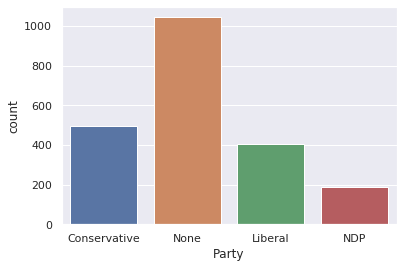

In [224]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Party", data=df_Election_Ori,)

### **2.2. Visualization**

##### **2.2.1. Generic Tweets Visualization - Word Cloud**

We create a word cloud to visualize the words for the positive and negative tweets for the generic tweets dataset. We can see that the words for positive tweets are pretty obvious and apparent to show the positivity while the words for the negative tweets are not very apparent to show the negativity.

In [0]:
Generic_Positive = df_Generic[df_Generic['sentiment']==4]
Generic_Negative = df_Generic[df_Generic['sentiment']==0]
Generic_Positive_Word = " ".join(text for text in Generic_Positive.tweets)
Generic_Negative_Word = " ".join(text for text in Generic_Negative.tweets)

(-0.5, 399.5, 199.5, -0.5)

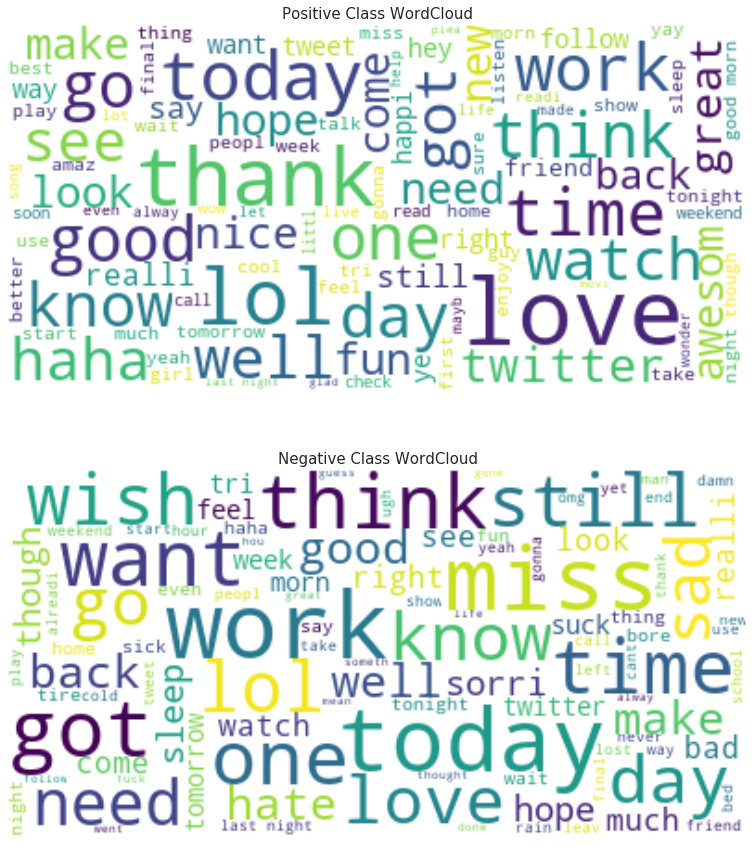

In [226]:
fig, ax = plt.subplots(2, 1, figsize  = (15,15))
wordcloud_Positive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Generic_Positive_Word)
wordcloud_Negative = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Generic_Negative_Word)
ax[0].imshow(wordcloud_Positive, interpolation='bilinear')
ax[0].set_title('Positive Class WordCloud',fontsize=15)
ax[0].axis('off')
ax[1].imshow(wordcloud_Negative, interpolation='bilinear')
ax[1].set_title('Negative Class WordCloud',fontsize=15)
ax[1].axis('off')

#### **2.2 Canadian Election Visualization - Barplot**

For the Canadian Election dataset, we visualize it by negative reasons by using a bar chart. We can see that most frequent reason for the negative sentiment is "Other", followed by "Scandal" and "Tell lies".

In [227]:
df_Election.head()

,sentiment,negative_reason,text
0,negative,Women Reproductive right and Racism,rosiebarton instead suggest agre canadian wome...
1,positive,NaN,allwomanspacewalk real space_st etobicokenorth...
2,negative,Economy,brantford go cost billion next year ask justin...
3,positive,NaN,canada canadaelection2019 canadavot ncan decid...
4,negative,Economy,canada sick tire hard earn donat corpor welfar...


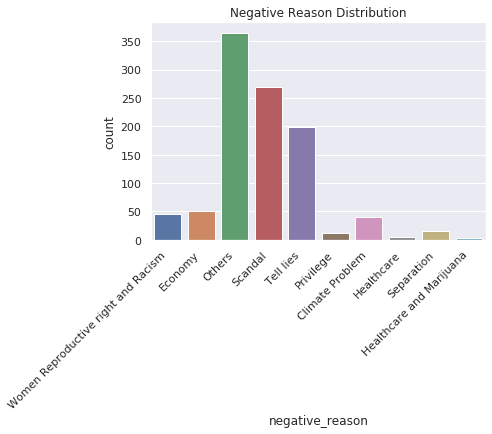

In [228]:
sns.set(style="darkgrid")
ax = sns.countplot(x='negative_reason',data=df_Election)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
plt.title('Negative Reason Distribution')
plt.show()

## **3. Model Preparation**

In this part, we are going to apply different classification algorithms, including logistic regression, K-NN, Naive Bayes, SVM, decision trees and ensembles (Random forest and XGBoost). We use 2 types of features, Bag of words (word frequency) and TF-IDF. Word Embedding is also used but this part is applied at the end of this IPython Notebook. Since the vocabulary size is huge, we only select the top 1500 most frequent words (by term frequency).

In [229]:
df_Generic.head()

,tweets,sentiment
0,switchfoot awww bummer shoulda got david carr ...,0.0
1,upset updat facebook might cri result school t...,0.0
2,kenichan dive mani time ball manag save rest b...,0.0
3,whole bodi feel itchi like fire,0.0
4,nationwideclass behav mad see,0.0


In [0]:
y = df_Generic['sentiment']

### **3.1. Bag of Words (WF)**

The Bag of Words model records the number of times that a term occurs in a document.

In [0]:
vectorizer = CountVectorizer(max_features=1500)
array_WF = vectorizer.fit_transform(df_Generic['tweets'])#.toarray()

In [0]:
X_WF_train, X_WF_test, y_WF_train, y_WF_test = train_test_split(array_WF,y,test_size=0.3)

### **3.2. TF-IDF**

TF-IDF is calculated by: $\mbox{tf-idf}(d, t) = \mbox{tf}(t) \cdot \mbox{idf}(d, t)$, which is the term frequency times the inverse document frequency

In [0]:
vectorizer2 = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1500)
array_TFIDF = vectorizer2.fit_transform(df_Generic['tweets'])#.toarray()

In [0]:
X_TFIDF_train, X_TFIDF_test, y_TFIDF_train, y_TFIDF_test = train_test_split(array_TFIDF,y,test_size=0.3)

## **4. Model Implementation**

### **4.1. Applications (7 Models)**

In this part, we train 7 different classification models and test them and obtain the accuracy values.

#### **4.1.1. Logistic Regression**

In [0]:
model_LR_WF = LogisticRegression(solver='lbfgs',max_iter=1000)
model_LR_WF.fit(X_WF_train,y_WF_train)
predictions_LR_WF = model_LR_WF.predict(X_WF_test)
score_LR_WF = accuracy_score(y_WF_test,predictions_LR_WF)

In [267]:
print('Accuracy =','%.2f' % (score_LR_WF*100),'%')

Accuracy = 75.11 %


In [0]:
model_LR_TFIDF = LogisticRegression(solver='lbfgs',max_iter=1000)
model_LR_TFIDF.fit(X_TFIDF_train,y_TFIDF_train)
predictions_LR_TFIDF = model_LR_TFIDF.predict(X_TFIDF_test)
score_LR_TFIDF = accuracy_score(y_TFIDF_test,predictions_LR_TFIDF)

In [269]:
print('Accuracy =','%.2f' % (score_LR_TFIDF*100),'%')

Accuracy = 74.83 %


#### **4.1.2. K-NN**

In [0]:
model_KNN_WF = KNeighborsClassifier()
model_KNN_WF.fit(X_WF_train,y_WF_train)
predictions_KNN_WF = model_KNN_WF.predict(X_WF_test)
score_KNN_WF = accuracy_score(y_WF_test,predictions_KNN_WF)

In [240]:
print('Accuracy =','%.2f' % (score_KNN_WF*100),'%')

Accuracy = 67.31 %


In [0]:
model_KNN_TFIDF = KNeighborsClassifier()
model_KNN_TFIDF.fit(X_TFIDF_train,y_TFIDF_train)
predictions_KNN_TFIDF = model_KNN_TFIDF.predict(X_TFIDF_test)
score_KNN_TFIDF = accuracy_score(y_TFIDF_test,predictions_KNN_TFIDF)

In [242]:
print('Accuracy =','%.2f' % (score_KNN_TFIDF*100),'%')

Accuracy = 67.56 %


#### **4.1.3. Naive Bayes**

In [0]:
model_NB_WF = MultinomialNB()
model_NB_WF.fit(X_WF_train,y_WF_train)
predictions_NB_WF = model_NB_WF.predict(X_WF_test)
score_NB_WF = accuracy_score(y_WF_test,predictions_NB_WF)

In [244]:
print('Accuracy =','%.2f' % (score_NB_WF*100),'%')

Accuracy = 74.43 %


In [0]:
model_NB_TFIDF = MultinomialNB()
model_NB_TFIDF.fit(X_TFIDF_train,y_TFIDF_train)
predictions_NB_TFIDF = model_NB_TFIDF.predict(X_TFIDF_test)
score_NB_TFIDF = accuracy_score(y_TFIDF_test,predictions_NB_TFIDF)

In [246]:
print('Accuracy =','%.2f' % (score_NB_TFIDF*100),'%')

Accuracy = 73.66 %


#### **4.1.4. SVM**

In [0]:
model_SVM_WF = LinearSVC(max_iter=10000)
model_SVM_WF.fit(X_WF_train,y_WF_train)
predictions_SVM_WF = model_SVM_WF.predict(X_WF_test)
score_SVM_WF = accuracy_score(y_WF_test,predictions_SVM_WF)

In [248]:
print('Accuracy =','%.2f' % (score_SVM_WF*100),'%')

Accuracy = 75.06 %


In [249]:
model_SVM_TFIDF = LinearSVC(max_iter=10000)
model_SVM_TFIDF.fit(X_TFIDF_train,y_TFIDF_train)
predictions_SVM_TFIDF = model_SVM_TFIDF.predict(X_TFIDF_test)
score_SVM_TFIDF = accuracy_score(y_TFIDF_test,predictions_SVM_TFIDF)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [250]:
print('Accuracy =','%.2f' % (score_SVM_TFIDF*100),'%')

Accuracy = 74.86 %


#### **4.1.5. Decision Tree**

In [0]:
model_DT_WF = DecisionTreeClassifier()
model_DT_WF.fit(X_WF_train,y_WF_train)
predictions_DT_WF = model_DT_WF.predict(X_WF_test)
score_DT_WF = accuracy_score(y_WF_test,predictions_DT_WF)

In [252]:
print('Accuracy =','%.2f' % (score_DT_WF*100),'%')

Accuracy = 68.23 %


In [0]:
model_DT_TFIDF = DecisionTreeClassifier()
model_DT_TFIDF.fit(X_TFIDF_train,y_TFIDF_train)
predictions_DT_TFIDF = model_DT_TFIDF.predict(X_TFIDF_test)
score_DT_TFIDF = accuracy_score(y_TFIDF_test,predictions_DT_TFIDF)

In [254]:
print('Accuracy =','%.2f' % (score_DT_TFIDF*100),'%')

Accuracy = 68.07 %


#### **4.1.6. Random Forest**

In [255]:
model_RF_WF = RandomForestClassifier()
model_RF_WF.fit(X_WF_train,y_WF_train)
predictions_RF_WF = model_RF_WF.predict(X_WF_test)
score_RF_WF = accuracy_score(y_WF_test,predictions_RF_WF)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [256]:
print('Accuracy =','%.2f' % (score_RF_WF*100),'%')

Accuracy = 71.66 %


In [257]:
model_RF_TFIDF = RandomForestClassifier()
model_RF_TFIDF.fit(X_TFIDF_train,y_TFIDF_train)
predictions_RF_TFIDF = model_RF_TFIDF.predict(X_TFIDF_test)
score_RF_TFIDF = accuracy_score(y_TFIDF_test,predictions_RF_TFIDF)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [258]:
print('Accuracy =','%.2f' % (score_RF_TFIDF*100),'%')

Accuracy = 71.72 %


#### **4.1.7. XGBoost**

In [0]:
model_XGB_WF=xgb.XGBClassifier()
model_XGB_WF.fit(X_WF_train,y_WF_train)
predictions_XGB_WF = model_XGB_WF.predict(X_WF_test)
score_XGB_WF = accuracy_score(y_WF_test,predictions_XGB_WF)

In [260]:
print('Accuracy =','%.2f' % (score_XGB_WF*100),'%')

Accuracy = 68.09 %


In [0]:
model_XGB_TFIDF=xgb.XGBClassifier()
model_XGB_TFIDF.fit(X_TFIDF_train,y_TFIDF_train)
predictions_XGB_TFIDF = model_XGB_TFIDF.predict(X_TFIDF_test)
score_XGB_TFIDF = accuracy_score(y_TFIDF_test,predictions_XGB_TFIDF)

In [262]:
print('Accuracy =','%.2f' % (score_XGB_TFIDF*100),'%')

Accuracy = 67.98 %


### **4.2. Evaluate on the Canadian Election Data**

Based on the above section, the best model is the logistic regression model (with the Bag of Word as features). Here we add the 'Party' column for the analysis in next section (4.3).

In [270]:
df_Election['Party'] = df_Election_Ori['Party']
df_Election.head()

,sentiment,negative_reason,text,Party
0,negative,Women Reproductive right and Racism,rosiebarton instead suggest agre canadian wome...,Conservative
1,positive,NaN,allwomanspacewalk real space_st etobicokenorth...,None
2,negative,Economy,brantford go cost billion next year ask justin...,Liberal
3,positive,NaN,canada canadaelection2019 canadavot ncan decid...,None
4,negative,Economy,canada sick tire hard earn donat corpor welfar...,Liberal


In [0]:
y1 = df_Election['sentiment']

In [0]:
vectorizer3 = CountVectorizer(max_features=1500)
array = vectorizer3.fit_transform(df_Election['text']).toarray()

In [0]:
DF = pd.DataFrame(array, columns = vectorizer3.get_feature_names())

In [0]:
DF['Party'] = df_Election['Party']

In [276]:
DF.head()

,000,100,2015,2019,21st,300,3rd,500,abc,abl,ableg,abort,abpoli,absolut,abus,accept,access,accord,account,accus,acoyn,across,act,action,activ,activist,actual,ad,adam,address,adequ,adult,advanc,advertis,advic,advis,advoc,afford,afraid,age,...,wish,wit,within,without,woman,women,wonder,word,work,worker,world,worri,wors,worst,worth,would,wow,write,wrong,wrote,xdeimo,yankeedoodleandi,ye,yeah,year,yeg,yell,yesterday,yet,yfblanchet,ygk,york,young,youth,yqg,yr,yup,yyc,zero,Party
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Conservative
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Liberal
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Liberal


In [0]:
X_train, X_test, y_train, y_test = train_test_split(DF,y1,test_size=0.3)

In [307]:
X_test.shape()

(640, 1501)

In [0]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train.iloc[:, :-1],y_train)
predictions = model.predict(X_test.iloc[:, :-1])
score = accuracy_score(y_test,predictions)

In [280]:
print('Accuracy =','%.2f' % (score*100),'%')

Accuracy = 68.28 %


We can see that when we apply the same model to the 2019 Canadian election data, the accuracy is not as good as the accuracy for the Generic data.

### **4.3. Visualize Sentiment Prediction for 3 Parties**

After we applied the logistic regression model, we create a new dataframe using the test data. The dataframe has 3 columns, party, true sentiment (y_test) and predicted sentiment (predictions).

In [0]:
df_party = pd.DataFrame(data = X_test['Party'])
df_party['True Sentiment'] = y_test
df_party['Predicted Sentiment'] = predictions

In [320]:
df_party

,Party,True Sentiment,Predicted Sentiment
114,None,negative,negative
1612,None,positive,positive
979,None,negative,negative
1769,Conservative,negative,positive
948,None,negative,negative
...,...,...,...
46,None,negative,negative
158,Conservative,negative,negative
212,Conservative,negative,negative
1510,None,negative,negative


Now we define a function to compute the accuracy for different parties (Liberal, Conservative, NDP and None). The accuracy for each party is further separated into Overall Accuracy, Accuracy for the positive tweets and Accuracy for the negative tweets.

In [0]:
def accuracy_by_party(Party):
  df_by_party = df_party[df_party.Party == Party]
  df_positive = df_by_party[df_by_party['True Sentiment'] == 'positive']
  df_negative = df_by_party[df_by_party['True Sentiment'] == 'negative']
  score_overall = accuracy_score(df_by_party['True Sentiment'],df_by_party['Predicted Sentiment'])
  score_positive = accuracy_score(df_positive['True Sentiment'],df_positive['Predicted Sentiment'])
  score_negative = accuracy_score(df_negative['True Sentiment'],df_negative['Predicted Sentiment'])
  #print('Accuracy_Overall =', score_overall*100)
  #print('Accuracy_Positive =', score_positive*100)
  #print('Accuracy_Negative =', score_negative*100)
  return score_overall*100, score_positive*100, score_negative*100

In [0]:
Liberal_Accuracy = accuracy_by_party('Liberal')
Conservative_Accuracy = accuracy_by_party('Conservative')
NDP_Accuracy = accuracy_by_party('NDP')
None_Accuracy = accuracy_by_party('None')

Accuracy_Overall = [Liberal_Accuracy[0],Conservative_Accuracy[0],NDP_Accuracy[0],None_Accuracy[0]]
Accuracy_Positive = [Liberal_Accuracy[1],Conservative_Accuracy[1],NDP_Accuracy[1],None_Accuracy[1]]
Accuracy_Negative = [Liberal_Accuracy[2],Conservative_Accuracy[2],NDP_Accuracy[2],None_Accuracy[2]]

Then we visualize the sentiment prediction for each of the parties.

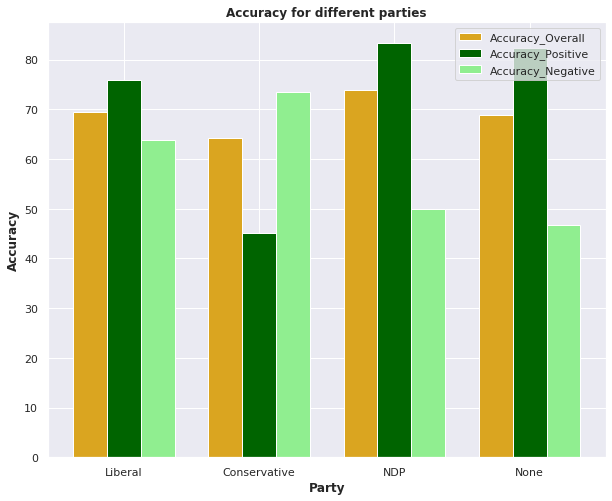

In [323]:
plt.figure(figsize=(10,8))

barWidth = 0.25

r1 = np.arange(len(Accuracy_Overall))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, Accuracy_Overall, color='goldenrod', width=barWidth, edgecolor='white', label='Accuracy_Overall')
plt.bar(r2, Accuracy_Positive, color='darkgreen', width=barWidth, edgecolor='white', label='Accuracy_Positive')
plt.bar(r3, Accuracy_Negative, color='lightgreen', width=barWidth, edgecolor='white', label='Accuracy_Negative')

plt.xlabel('Party', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(Accuracy_Overall))], ['Liberal', 'Conservative', 'NDP', 'None'])
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Accuracy for different parties',fontweight='bold' )

plt.legend()
plt.show()

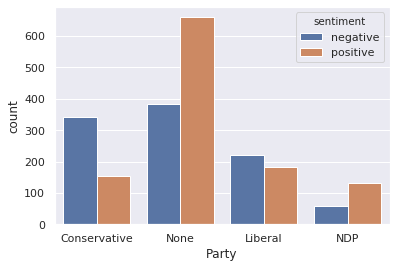

In [340]:
sns.countplot(x="Party",hue="sentiment", data=df_Election)
plt.show()

As we can see from the above plots, first we use logistic regression to predict the sentiment and compute the accuracy for each parties. We can see that the overall accuracy for the Liberal party is higher than the Conservative party. Also the positve sentiment accuracy for the Liberal party is also higher than the Conservative party. Secondly, we plot the true sentiment for each of the parties and we can see that the negative tweets for the Conservative party is higher than the Liberal party. Based on the 2019 election outcome, the Liberal party has 157 elected seats while the Conservative party has 121, which makes sense according to the above plots because it is clear that the tweets for Liberal party tend to be more "positive" than the Conservative party.
NLP analytics based on tweets is useful for political parties during election campaigns because not only can we predict the result for the election campaigns, but also the electoral parties can trace the socio-political sentiment by adjusting their campaigning strategies since this analytic reflect the social sentiment for different parties.

### **4.4. Analysis for Negative 2019 Canadian Election Tweets**

We are going to do multi-class classification to predict the reason for the negative tweets. Firstly, we extract all the negative tweets from the Canadian Election Tweets.

In [0]:
df_Election_Neg = df_Election[df_Election['sentiment']=='negative']
df_Election_Neg = df_Election_Neg.iloc[:,1:3]

In [396]:
df_Election_Neg

,negative_reason,text
0,Women Reproductive right and Racism,rosiebarton instead suggest agre canadian wome...
2,Economy,brantford go cost billion next year ask justin...
4,Economy,canada sick tire hard earn donat corpor welfar...
5,Others,canadavotes2019 cdnpoli fact blastfromthepast ...
8,Others,chooseforward cdnpoli ncanada make america mis...
...,...,...
2125,Others,supervillain elect fail job
2126,Climate Problem,care limit climatechang wonder parti vote clim...
2128,Scandal,know good enough job smear campaign right andr...
2129,Scandal,miss comment deflect issu answer best respons ...


We use Bag of Words and 3 algorithms (Logistic regression, K-NN and decision tres) to predict the negative reasons. The result is not as good as the binary classification for sentiment analysis.

#### **4.4.1 Using Word Frequency**

In [0]:
y2 = df_Election_Neg['negative_reason']

In [0]:
vectorizer4 = CountVectorizer(max_features=1500)
array2 = vectorizer4.fit_transform(df_Election_Neg['text']).toarray()

In [0]:
DF2 = pd.DataFrame(array2, columns = vectorizer4.get_feature_names())

In [400]:
DF2.head()

,000,100,2015,2016,2019,21st,3rd,5th,abc,abl,ableg,abort,abpoli,absolut,accept,access,account,accus,acoyn,across,act,activ,activist,actual,ad,addit,address,admit,advanc,advertis,advis,affect,afford,afraid,age,agenda,ago,agre,agreement,ahead,...,without,wolv,woman,women,wonder,word,work,worker,world,worldwid,worri,wors,worst,worth,would,wow,writ,write,wrong,xdeimo,yankeedoodleandi,ye,yeah,year,yeg,yell,yesterday,yet,yfblanchet,ygk,yike,young,youtub,yqg,yql,yr,yup,yvrre,yyc,zero
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(DF2,y2,test_size=0.3)

In [408]:
X_test2.shape

(302, 1500)

#### **4.4.2. Logistic Regression**

In [0]:
model_LR = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
model_LR.fit(X_train2,y_train2)
predictions_LR = model_LR.predict(X_test2)
score_LR = accuracy_score(y_test2,predictions_LR)

In [403]:
print('Accuracy =','%.2f' % (score_LR*100),'%')

Accuracy = 54.97 %


#### **4.4.3. K-NN**

In [0]:
model_KNN = KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(X_train2,y_train2)
predictions_KNN = model_KNN.predict(X_test2)
score_KNN = accuracy_score(y_test2,predictions_KNN)

In [405]:
print('Accuracy =','%.2f' % (score_KNN*100),'%')

Accuracy = 42.05 %


#### **4.4.4. Decision Tree**

In [0]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train2,y_train2)
predictions_DT = model_DT.predict(X_test2)
score_DT = accuracy_score(y_test2,predictions_DT)

In [407]:
print('Accuracy =','%.2f' % (score_DT*100),'%')

Accuracy = 53.97 %


## **5. Results**

What can public opinion on Twitter tell us about the Canadian political landscape in 2019?
In section 4.2, we used logistic regression which is the best model for generic_tweets prediction. When we use this model on Canadian Election 2019, the accuracy is 68.28%. This prediction brings an insight for the sentiment for different parties. That also says, when we use this model to predict the sentiment (which is a binary classification), we have 68.28% accuracy to predict the correct sentiment, based on the cleaned tweets. Each parties's accuracy was computed in section 4.3. According the first plot in section 4.3, our model has the best prediction for the NDP, followed bt the Liberal. Both these parties have high accuracy for positive tweets and relatively lower accuracy for negative tweets. However, for the Conservative , the prediction for the positive tweets is much lower than negative tweets. Based on the second plot in section 4.3, we see that there are more negative tweets than positive tweets for the Conservative party. For the Liberal, the numbers of negative and positive tweets are very close. For the NDP, there are more positive tweets than negative tweets. This result effectively reflects the public opinions for different parties.

In section 4.4, the model that worked best is still the logistic regression. But the accuracy is only about 55%, which is low. Some reasons may include:

1, There are too many classes (9 
plus Other, so 10). See the code below.

2, We did not do hyperparameter tuning.

3, The dataset small (only 1006 tweets). The test set has only 302 samples. See the code below.

4, The text contents in different negative reasons are not very identifiable because the reason classes are also not very identifiable (for example, separation is not clear to understand, and there are lots of "Other" reason).

5, The method to create features is not perfect. We limit the number of features to only 1500. See the code below.

Suggestions:

For the first model, we can try hyperparameter tuning and try to make the feature size bigger. Or try to do cross-validation (with few folds since the sample size is small).

For the second model, we can try to reduce the classe by combining some reasons with others. Or even recreate some reasons that are easier to identify. Or try to find the text content in the "Other" reason and re-categorize the reasons.

In [410]:
y_test2.unique()

array(['Climate Problem', 'Others', 'Healthcare',
       'Women Reproductive right and Racism', 'Scandal', 'Tell lies',
       'Economy', 'Healthcare and Marijuana', 'Separation', 'Privilege'],
      dtype=object)

In [412]:
y_test2.shape

(302,)

In [413]:
X_test2.shape

(302, 1500)

## **6. Extra Innovation**

### **6.1. Word Embedding for Section 4.2**

In [0]:
try:
    from gensim.models import word2vec
except:
    !pip install gensim
    from gensim.models import word2vec

In [0]:
tokenized_sentences = [sentence.split() for sentence in df_Election['text']]
model = word2vec.Word2Vec(tokenized_sentences, size=1000, min_count=1)

In [381]:
model.most_similar(['year'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('cdnpoli', 0.9996523857116699),
 ('canada', 0.9995955228805542),
 ('canadian', 0.9995874166488647),
 ('liber', 0.9995782375335693),
 ('parti', 0.9995773434638977),
 ('like', 0.9995744824409485),
 ('right', 0.9995721578598022),
 ('need', 0.9995704293251038),
 ('campaign', 0.9995678663253784),
 ('elect', 0.9995676279067993)]

In [0]:
def buildWordVector(text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    text = text.split(' ')
    for word in text:
        vec += model[word].reshape((1, size))
        count += 1.
    if count != 0:
        vec /= count
    return vec

In [383]:
array_wordEmbedding = np.concatenate([buildWordVector(z, 1000) for z in df_Election['text']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [384]:
array_wordEmbedding.shape

(2133, 1000)

In [0]:
DF_WE = pd.DataFrame(array_wordEmbedding)

In [386]:
DF_WE.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0.009192,0.003209,0.004897,0.008702,0.004111,0.008378,-0.001628,-0.007154,-0.004914,-0.010495,-0.010386,-0.005349,0.006337,-0.002185,-0.003496,-0.012403,0.015823,0.007503,0.012445,0.017528,-0.002137,-0.009195,0.016601,0.013063,0.000267,-0.003428,0.000409,-0.003660,-0.005149,-0.007668,-0.001240,0.017306,-0.011246,0.010373,-0.009292,0.013969,0.011042,-0.010419,0.003256,0.001487,...,-0.001638,0.006356,-0.006332,-0.002210,-0.002510,-0.012949,-0.007079,0.008787,0.006460,-0.010364,0.010351,-0.017121,0.004451,0.007011,0.011748,-0.007951,0.006104,-0.015119,0.001609,-0.003470,0.012486,0.009045,0.001010,0.001927,0.012253,-0.002856,0.000832,-0.005033,-0.009815,0.018118,-0.023212,-0.025098,-0.011468,-0.004892,-0.009144,-0.005170,-0.019378,0.001269,-0.019901,0.012656
1,0.005716,0.001915,0.003158,0.005647,0.002732,0.005146,-0.000854,-0.004556,-0.003068,-0.006736,-0.006671,-0.003472,0.004044,-0.001429,-0.002221,-0.007894,0.010036,0.004734,0.007994,0.011131,-0.001415,-0.005822,0.010581,0.008454,0.000232,-0.002337,0.000109,-0.002277,-0.003201,-0.005070,-0.000800,0.010862,-0.007065,0.006564,-0.005915,0.008891,0.006882,-0.006628,0.002153,0.000936,...,-0.001180,0.004172,-0.003894,-0.001410,-0.001418,-0.008286,-0.004350,0.005805,0.004326,-0.006664,0.006508,-0.010933,0.003054,0.004487,0.007588,-0.004960,0.003839,-0.009655,0.000988,-0.002245,0.008125,0.005797,0.000294,0.001307,0.007946,-0.001838,0.000550,-0.003106,-0.006340,0.011464,-0.014820,-0.016191,-0.007078,-0.003166,-0.006041,-0.003226,-0.012460,0.000776,-0.012703,0.007982
2,0.009694,0.003305,0.005179,0.009168,0.004480,0.008846,-0.001771,-0.007776,-0.005297,-0.011119,-0.011079,-0.005574,0.006605,-0.002514,-0.003746,-0.013143,0.016798,0.007928,0.013291,0.018511,-0.002388,-0.009649,0.017546,0.014181,0.000380,-0.003570,0.000209,-0.004066,-0.005354,-0.008168,-0.001140,0.018286,-0.011825,0.010886,-0.009752,0.014728,0.011521,-0.010983,0.003495,0.001450,...,-0.001827,0.006865,-0.006811,-0.002276,-0.002907,-0.013901,-0.007590,0.009392,0.007086,-0.010870,0.010895,-0.018262,0.004841,0.007510,0.012591,-0.008460,0.006271,-0.016117,0.001603,-0.003684,0.013502,0.009634,0.000948,0.001971,0.013068,-0.002872,0.000627,-0.005162,-0.010297,0.019239,-0.024625,-0.026744,-0.011958,-0.005094,-0.009727,-0.005541,-0.020642,0.001313,-0.021113,0.013260
3,0.007418,0.002618,0.003984,0.006859,0.003573,0.006976,-0.001342,-0.006044,-0.004124,-0.008726,-0.008718,-0.004392,0.005148,-0.001886,-0.002803,-0.010129,0.013349,0.006323,0.010412,0.014294,-0.001672,-0.007326,0.013826,0.011012,0.000264,-0.002814,0.000079,-0.002888,-0.004356,-0.006251,-0.000789,0.014340,-0.009150,0.008694,-0.007644,0.011676,0.008853,-0.008718,0.002629,0.001260,...,-0.001453,0.005453,-0.005298,-0.001796,-0.002139,-0.011046,-0.005815,0.007349,0.005567,-0.008483,0.008459,-0.014065,0.003584,0.005730,0.009830,-0.006817,0.005003,-0.012568,0.001293,-0.003032,0.010588,0.007460,0.000760,0.001566,0.010255,-0.002290,0.000505,-0.004157,-0.008353,0.015098,-0.019263,-0.020934,-0.009302,-0.004078,-0.007803,-0.004283,-0.016188,0.000909,-0.016622,0.010434
4,0.006903,0.002386,0.003747,0.006667,0.003227,0.006352,-0.001216,-0.005385,-0.003853,-0.007915,-0.008006,-0.003996,0.004954,-0.001721,-0.002699,-0.009350,0.012077,0.005680,0.009415,0.013298,-0.001662,-0.006801,0.012536,0.010116,0.000309,-0.002671,0.000225,-0.002815,-0.003921,-0.005848,-0.000692,0.013106,-0.008371,0.007649,-0.006987,0.010676,0.008294,-0.007915,0.002489,0.001017,...,-0.001301,0.004928,-0.004723,-0.001655,-0.001873,-0.009842,-0.005324,0.006818,0.005024,-0.007930,0.007874,-0.012901,0.003377,0.005344,0.008931,-0.006062,0.004585,-0.011487,0.001203,-0.002686,0.009652,0.006861,0.000684,0.001457,0.009455,-0.002149,0.000543,-0.003881,-0.0074

In [0]:
X_WE_train, X_WE_test, y_WE_train, y_WE_test = train_test_split(DF_WE,y1,test_size=0.3)

In [388]:
X_WE_test.shape

(640, 1000)

In [0]:
model_WE = LogisticRegression(solver='lbfgs')
model_WE.fit(X_WE_train,y_WE_train)
predictions_WE = model_WE.predict(X_WE_test)
score_WE = accuracy_score(y_WE_test,predictions_WE)

In [390]:
print('Accuracy =','%.2f' % (score_WE*100),'%')

Accuracy = 54.06 %


### **6.2. Extra data exploration**

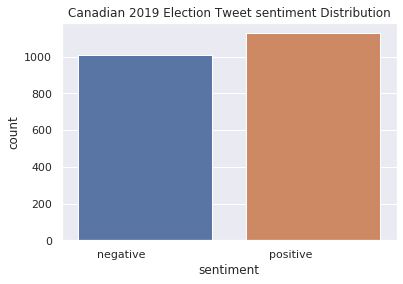

In [444]:
sns.set(style="darkgrid")
ax = sns.countplot(x='sentiment',data=df_Election)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0,ha='right')
plt.title('Canadian 2019 Election Tweet sentiment Distribution')
plt.show()